## Tabalho Pratico 4

### Imports

In [379]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

### Carregando Imagens

In [404]:
img_bolhas = cv2.imread('bolhas.png')[:,:,::-1]
img_bolhas_gray =  cv2.cvtColor(img_bolhas, cv2.COLOR_RGB2GRAY)

img_coins = cv2.imread('coins-01.jpg')[:,:,::-1]
img_coins_gray =  cv2.cvtColor(img_coins, cv2.COLOR_RGB2GRAY)

img_shapes = cv2.imread('shapes.png')[:,:,::-1]
img_shapes_gray =  cv2.cvtColor(img_shapes, cv2.COLOR_RGB2GRAY)

### Redução de ruido


Removemos o ruido atraves do filtro gaussiano. Não fizemos o mesmo para a img_bolhas e img_shapes pois ambas não possuem ruido.

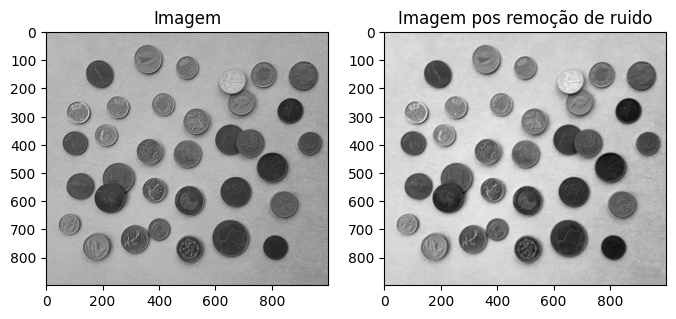

In [405]:
fig = plt.figure()
fig.set_figheight(8)
fig.set_figwidth(8)
fig.add_subplot(1,2,1)
plt.title("Imagem")
plt.imshow(img_coins_gray, cmap='gray')

img_coins_gblur = cv2.GaussianBlur(img_coins_gray, [7, 7], 0)

fig.add_subplot(1,2,2)
plt.title("Imagem pos remoção de ruido")
plt.imshow(img_coins_gblur, cmap='gray')


### Remover fundo

## Remoção de fundo


### Imagem "bolhas.png"

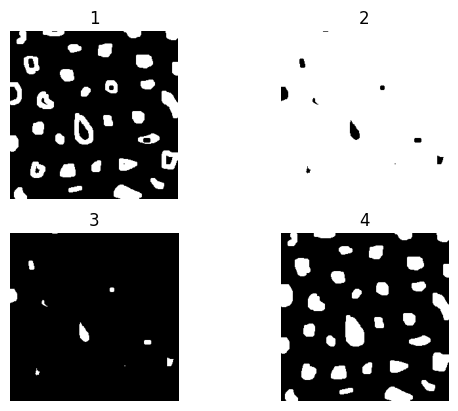

In [406]:
img_floodfill = img_bolhas_gray.copy()
height, width = img_floodfill.shape[:2]
mask = np.zeros((height+2, width+2), np.uint8)
    
cv2.floodFill(img_floodfill, mask, (0, 0), 255)
    
inverse_floodFill = cv2.bitwise_not(img_floodfill)
foreground_img_bolhas = cv2.bitwise_or(img_bolhas_gray, inverse_floodFill)

plt.subplot(2, 2, 1), plt.title('1'), plt.axis('OFF'), plt.imshow(img_bolhas_gray, cmap='gray')
plt.subplot(2, 2, 2), plt.title('2'), plt.axis('OFF'), plt.imshow(img_floodfill, cmap='gray')
plt.subplot(2, 2, 3), plt.title('3'), plt.axis('OFF'), plt.imshow(inverse_floodFill, cmap='gray')
plt.subplot(2, 2, 4), plt.title('4'), plt.axis('OFF'), plt.imshow(foreground_img_bolhas, cmap='gray')

plt.show()

### Imagem "coins-01.jpg"

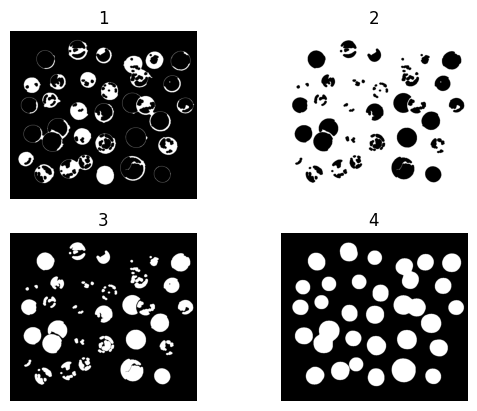

In [407]:
canny_img = cv2.Canny(img_coins_gblur, 100, 0)
        
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, [7, 7])
canny_img = cv2.morphologyEx(canny_img, cv2.MORPH_CLOSE, kernel, iterations=2)
        
img_coins_gblur = canny_img.copy()

img_floodfill = img_coins_gblur.copy()
height, width = img_floodfill.shape[:2]
mask = np.zeros((height+2, width+2), np.uint8)
    
cv2.floodFill(img_floodfill, mask, (0, 0), 255)
    
inverse_floodFill = cv2.bitwise_not(img_floodfill)  

foreground_img_coins = cv2.bitwise_or(img_coins_gblur, inverse_floodFill)
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, [75, 75])
foreground_img_coins = cv2.morphologyEx(foreground_img_coins, cv2.MORPH_OPEN, kernel, iterations=1)
        
kernel2 = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, [3, 3])
foreground_img_coins = cv2.erode(foreground_img_coins, kernel2, iterations=2)
foreground_img_coins = cv2.morphologyEx(foreground_img_coins, cv2.MORPH_OPEN, kernel)

plt.subplot(2, 2, 1), plt.title('1'), plt.axis('OFF'), plt.imshow(img_coins_gblur, cmap='gray')
plt.subplot(2, 2, 2), plt.title('2'), plt.axis('OFF'), plt.imshow(img_floodfill, cmap='gray')
plt.subplot(2, 2, 3), plt.title('3'), plt.axis('OFF'), plt.imshow(inverse_floodFill, cmap='gray')
plt.subplot(2, 2, 4), plt.title('4'), plt.axis('OFF'), plt.imshow(foreground_img_coins, cmap='gray')

plt.show()

### Imagem shapes.png

Não sera necessario passar pelo processo, pois o fundo e a imagem ja estão com cores uniformes

## Algoritmo de segmentação

In [408]:


def percorrer_tudo(imagem):
    img_height,img_width  = imagem.shape[:2]

    visitados = np.zeros((img_height,img_width))

    total_de_objetos = 0

    for i in range(imagem.shape[0]):
        for j in range(imagem.shape[1]):
            if(imagem[i][j] == 255 and visitados[i][j] == 0):

                visitados[i][j] = 1

                total_de_objetos+=1 #a cada novo objeto incrementa a quantidade

                tonalidade = total_de_objetos*5 + 10 #para atribuir diferentes tonalidades aos objetos
                imagem[i][j] = tonalidade
                percorrer(i, j, tonalidade,visitados, imagem,img_height,img_width)

    return imagem

def percorrer(x,y, tonalidade,visitados, imagem, img_height, img_width):
    #percorre pela esquerda
    if(x>0):
        if(visitados[x-1][y] != 1):
            visitados[x-1][y] = 1
            if(imagem[x-1][y] == 255):
                imagem[x-1][y] = tonalidade
                percorrer(x-1,y,tonalidade,visitados,imagem,img_height,img_width)
    #percorre pela direita
    if(x+1<img_width):
        if (visitados[x + 1][y] != 1):
            visitados[x + 1][y] = 1
            if (imagem[x + 1][y] == 255):
                imagem[x + 1][y] = tonalidade
                percorrer(x + 1, y,tonalidade,visitados, imagem,img_height,img_width)
    
        #percorre por cima
    if(y>0):
        if (visitados[x][y-1] != 1):
            visitados[x][y-1] = 1
            if (imagem[x][y-1] == 255):
                imagem[x][y-1] = tonalidade
                percorrer(x , y-1,tonalidade,visitados, imagem,img_height,img_width)


        #percorre por baixo
    if(y+1<img_height):
        if (visitados[x][y+1] != 1):
            visitados[x][y+1] = 1
            if (imagem[x][y+1] == 255):
                imagem[x] [y+1] = tonalidade
                percorrer(x, y+1,tonalidade,visitados, imagem,img_height,img_width)


In [409]:
img_nova = percorrer_tudo(foreground_img_bolhas)

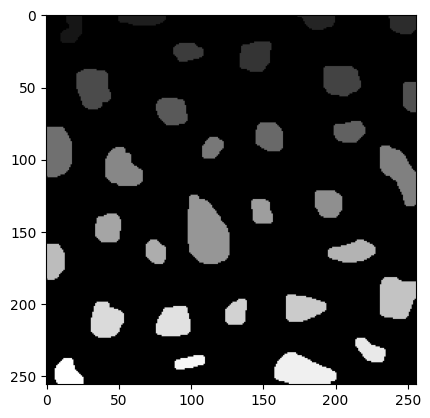

In [410]:
plt.imshow(img_nova, cmap="gray")

In [411]:
img_nova_2 = percorrer_tudo(foreground_img_coins)

RecursionError: maximum recursion depth exceeded

In [ ]:
plt.imshow(img_nova_2, cmap="gray")